In [ ]:
!pip -qqq install qiskit[visualization]
!pip -qqq install qiskit-aer
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
# !sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.10/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\ncircuit_mpl_style = iqp\n" > ${HOME}/.qiskit/settings.conf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00


In [ ]:
#!pip install numexpr
#!pip install pylatexenc

from qiskit import *
from qiskit.visualization import plot_distribution
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from math import sqrt, pi
import numpy as np

import pandas as pd

from numpy.linalg import pinv

from qiskit.quantum_info import SparsePauliOp,Pauli
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import transpile

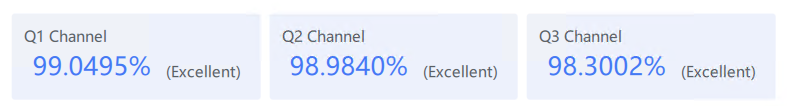

In [ ]:
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
Y=np.array([[0,-1j],[1j,0]])
Z=np.array([[1,0],[0,-1]])

In [ ]:
II=np.kron(I,I)
IX=np.kron(I,X)
IY=np.kron(I,Y)
IZ=np.kron(I,Z)

XI=np.kron(X,I)
XX=np.kron(X,X)
XY=np.kron(X,Y)
XZ=np.kron(X,Z)

YI=np.kron(Y,I)
YX=np.kron(Y,X)
YY=np.kron(Y,Y)
YZ=np.kron(Y,Z)

ZI=np.kron(Z,I)
ZX=np.kron(Z,X)
ZY=np.kron(Z,Y)
ZZ=np.kron(Z,Z)

In [ ]:
J=1
h=0.5
H=J*ZZ+h*IX+h*XI
autoval, autovec=np.linalg.eig(H)
print("Autovalores:", autoval)
print("Autovectores:", autovec)

Autovalores: [ 1.41421356  1.         -1.41421356 -1.        ]
Autovectores: [[-6.53281482e-01 -7.07106781e-01 -2.70598050e-01  6.02732551e-17]
 [-2.70598050e-01  4.19654635e-16  6.53281482e-01 -7.07106781e-01]
 [-2.70598050e-01  5.71679052e-16  6.53281482e-01  7.07106781e-01]
 [-6.53281482e-01  7.07106781e-01 -2.70598050e-01  2.26806709e-16]]


In [ ]:
base_ii_00=0.134 #0.127
base_ii_01=0.134 #0.067
base_ii_10=0.571 #0.572
base_ii_11=0.161 #0.234

base_ix_00=0.003 #0.106
base_ix_01=0.211 #0.089
base_ix_10=0.594 #0.661
base_ix_11=0.192 #0.144

base_iy_00=0.101 #0.190
base_iy_01=0.099 #0.005
base_iy_10=0.590 #0.661
base_iy_11=0.211 #0.144

base_iz_00=0.134 #0.127
base_iz_01=0.134 #0.067
base_iz_10=0.571 #0.572
base_iz_11=0.161 #0.234
# La i siempre es el segundo qubit (notación Q1Q2)


base_xi_00=0.092 #0.083
base_xi_01=0.101 #0.067
base_xi_10=0.633 #0.616
base_xi_11=0.174 #0.235

base_xx_00=0.104 #0.144
base_xx_01=0.087 #0.005
base_xx_10=0.510 #0.623
base_xx_11=0.299 #0.228

base_xy_00=0.000 #0.100
base_xy_01=0.237 #0.049
base_xy_10=0.676 #0.750
base_xy_11=0.087 #0.101

base_xz_00=0.092 #0.083
base_xz_01=0.101 #0.067
base_xz_10=0.633 #0.616
base_xz_11=0.174 #0.235



base_yi_00=0.249 #0.388
base_yi_01=0.281 #0.244
base_yi_10=0.310 #0.311
base_yi_11=0.160 #0.057

base_yx_00=0.464 #0.496
base_yx_01=0.104 #0.136
base_yx_10=0.238 #0.271
base_yx_11=0.193 #0.097

base_yy_00=0.447 #0.566
base_yy_01=0.154 #0.066
base_yy_10=0.246 #0.285
base_yy_11=0.153 #0.083

base_yz_00=0.249 #0.388
base_yz_01=0.281 #0.244
base_yz_10=0.310 #0.311
base_yz_11=0.160 #0.057



base_zi_00=0.134 #0.127
base_zi_01=0.134 #0.067
base_zi_10=0.571 #0.572
base_zi_11=0.161 #0.234

base_zx_00=0.003 #0.106
base_zx_01=0.211 #0.089
base_zx_10=0.594 #0.661
base_zx_11=0.192 #0.144

base_zy_00=0.101 #0.190
base_zy_01=0.099 #0.005
base_zy_10=0.590 #0.661
base_zy_11=0.211 #0.144

base_zz_00=0.134 #0.127
base_zz_01=0.134 #0.067
base_zz_10=0.571 #0.572
base_zz_11=0.161 #0.234

In [ ]:
base_ii=base_ii_00+base_ii_11-base_ii_01-base_ii_10
base_ix=base_ix_00+base_ix_11-base_ix_01-base_ix_10
base_iy=base_iy_00+base_iy_11-base_iy_01-base_iy_10
base_iz=base_iz_00+base_iz_11-base_iz_01-base_iz_10

base_xi=base_xi_00+base_xi_11-base_xi_01-base_xi_10
base_xx=base_xx_00+base_xx_11-base_xx_01-base_xx_10
base_xy=base_xy_00+base_xy_11-base_xy_01-base_xy_10
base_xz=base_xz_00+base_xz_11-base_xz_01-base_xz_10

base_yi=base_yi_00+base_yi_11-base_yi_01-base_yi_10
base_yx=base_yx_00+base_yx_11-base_yx_01-base_yx_10
base_yy=base_yy_00+base_yy_11-base_yy_01-base_yy_10
base_yz=base_yz_00+base_yz_11-base_yz_01-base_yz_10

base_zi=base_zi_00+base_zi_11-base_zi_01-base_zi_10
base_zx=base_zx_00+base_zx_11-base_zx_01-base_zx_10
base_zy=base_zy_00+base_zy_11-base_zy_01-base_zy_10
base_zz=base_zz_00+base_zz_11-base_zz_01-base_zz_10

print(base_zz, base_ix, base_xi)

-0.4099999999999999 -0.61 -0.46799999999999997


In [ ]:
S=np.array([[base_ii, base_ix, base_iy, base_iz,           base_xi, base_xx, base_xy, base_xz,           base_yi, base_yx, base_yy, base_yz,           base_zi, base_zx, base_zy, base_zz],
            [base_ix, base_ii, base_iz*1j, base_iy*1j,     base_xx, base_xi, base_xz*1j, base_xy*1j,     base_yx, base_yi, base_yz*1j, base_yy*1j,     base_zx, base_zi, base_zz*1j, base_zy*1j],
            [base_iy, -base_iz*1j, base_ii, base_ix*1j,    base_xy, -base_xz*1j, base_xi, base_xx*1j,    base_yy, -base_yz*1j, base_yi, base_yx*1j,    base_zy, -base_zz*1j, base_zi, base_zx*1j],
            [base_iz, -base_iy*1j, -base_ix*1j, base_ii,   base_xz, -base_xy*1j, -base_xx*1j, base_xi,   base_yz, -base_yy*1j, -base_yx*1j, base_yi,   base_zz, -base_zy*1j, -base_zx*1j, base_zi],

            [base_xi, base_xx, base_xy, base_xz,           base_ii, base_ix, base_iy, base_iz,           base_zi*1j, base_zx*1j, base_zy*1j, base_zz*1j,   base_yi*1j, base_yx*1j, base_yy*1j, base_yz*1j],
            [base_xx, base_xi, base_xz*1j, base_xy*1j,     base_ix, base_ii, base_iz*1j, base_iy*1j,     base_zx*1j, base_zi*1j, -base_zz, -base_zy,       base_yx*1j, base_yi*1j, -base_yz, -base_yy],
            [base_xy, -base_xz*1j, base_xi, base_xx*1j,    base_iy, -base_iz*1j, base_ii, base_ix*1j,    base_zy*1j, base_zz, base_zi*1j, -base_zx,        base_yy*1j, base_yz, base_yi*1j, -base_yx],
            [base_xz, -base_xy*1j, -base_xx*1j, base_xi,   base_iz, -base_iy*1j, -base_ix*1j, base_ii,   base_zz*1j, base_zy, base_zx, base_zi*1j,         base_yz*1j, base_yy, base_yx, base_yi*1j],

            [base_yi, base_yx, base_yy, base_yz,           -base_zi*1j, -base_zx*1j, -base_zy*1j, -base_zz*1j,   base_ii, base_ix, base_iy, base_iz,           base_xi*1j, base_xx*1j, base_xy*1j, base_xz*1j],
            [base_yx, base_yi, base_yz*1j, base_yy*1j,     -base_zx*1j, -base_zi*1j, base_zz, base_zy,           base_ix, base_ii, base_iz*1j, base_iy*1j,     base_xx*1j, base_xi*1j, -base_xz, -base_xy],
            [base_yy, -base_yz*1j, base_yi, base_yx*1j,    -base_zy*1j, -base_zz, -base_zi*1j, base_zx,          base_iy, -base_iz*1j, base_ii, base_ix*1j,    base_xy*1j, base_xz, base_xi*1j, -base_xx],
            [base_yz, -base_yy*1j, -base_yx*1j, base_yi,   -base_zz*1j, -base_zy, -base_zx, -base_zi*1j,         base_iz, -base_iy*1j, -base_ix*1j, base_ii,   base_xz*1j, base_xy, base_xx, base_xi*1j],

            [base_zi, base_zx, base_zy, base_zz,           -base_yi*1j, -base_yx*1j, -base_yy*1j, -base_yz*1j,   -base_xi*1j, -base_xx*1j, -base_xy*1j, -base_xz*1j,   base_ii, base_ix, base_iy, base_iz],
            [base_zx, base_zi, base_zz*1j, base_zy*1j,     -base_yx*1j, -base_yi*1j, base_yz, base_yy,           -base_xx*1j, -base_xi*1j, base_xz, base_xy,           base_ix, base_ii, base_iz*1j, base_iy*1j],
            [base_zy, -base_zz*1j, base_zi, base_zx*1j,    -base_yy*1j, -base_yz, -base_yi*1j, base_yx,          -base_xy*1j, -base_xz, -base_xi*1j, base_xx,          base_iy, -base_iz*1j, base_ii, base_ix*1j],
            [base_zz, -base_zy*1j, -base_zx*1j, base_zi,   -base_yz*1j, -base_yy, -base_yx, -base_yi*1j,         -base_xz*1j, -base_xy, -base_xx, -base_xi*1j,         base_iz, -base_iy*1j, -base_ix*1j, base_ii]])

#df = pd.DataFrame(S)
#df

In [ ]:
A=S+S.T

#df2 = pd.DataFrame(A)
#df2

In [ ]:
inc_tau=0.5
J=1
h=0.5

H_esp=J*base_zz+h*base_ix+h*base_xi
print(H_esp)
cte=-1j/(np.sqrt(1-2*inc_tau*H_esp))

Hsigi_sigiH_esp=np.array([0,-2j*J*base_zy, -2j*J*base_zx+2j*h*base_iz, -2j*h*base_iy,
                          -2j*J*base_yz, 0, 2j*h*base_xz, -2j*J*base_yi+2j*h*base_xy,
                          -2j*J*base_xz+2j*h*base_zi, 2j*h*base_zx, 2j*h*base_yz+2j*h*base_zy, -2j*J*base_xi+2j*h*base_yy+2j*h*base_zz,
                          2j*h*base_yi, -2j*J*base_iy+2j*h*base_yx, -2j*J*base_ix+2j*h*base_zz+2j*h*base_yy, 2j*h*base_zy+2j*h*base_yz])

b=cte*Hsigi_sigiH_esp
b

-0.9489999999999998


array([ 0.        -0.j,  0.54008912-0.j,  0.58020184-0.j,  0.27004456-0.j,
        0.26073268-0.j,  0.        -0.j, -0.33522773+0.j, -0.33092994+0.j,
        0.37677304-0.j, -0.43694212+0.j, -0.4004109 +0.j,  0.52003276-0.j,
       -0.13036634+0.j,  0.76572316-0.j,  0.72346155-0.j, -0.4004109 +0.j])

In [ ]:
a6 = -pinv(A) @ b
print(a6)

[ 0.40044501+0.j -0.01301992+0.j  0.02459191+0.j -0.51368719+0.j
  0.137015  +0.j  0.25736037+0.j -0.34090285+0.j  0.19739274+0.j
  0.07380505+0.j  0.06455681+0.j -0.23143381+0.j  0.55469398+0.j
 -0.00885109+0.j -0.24150213+0.j  0.57472545+0.j -0.20929055+0.j]


In [ ]:
a1=np.array([-2.16964333e+00+0.j,  9.00708865e-03+0.j, -2.45129782e-01+0.j,
  4.90987986e+01+0.j, -7.13025673e+00+0.j, -5.02708986e-13+0.j,
 -5.32190705e+00+0.j,  8.51879061e+00+0.j,  2.92276977e+00+0.j,
  5.46646358e+00+0.j,  4.54747351e-13+0.j, -1.92668923e-01+0.j,
 -4.86321635e+01+0.j,  1.04733589e-02+0.j, -2.98644968e+00+0.j,
  2.13549145e+00+0.j])

In [ ]:
a2=np.array([  7.25007282+0.j,  -0.83155596+0.j,  -5.25518725+0.j,   4.39456639+0.j,
   7.87634161+0.j,  11.53478459+0.j,  -5.08358237+0.j, -11.47777103+0.j,
  21.54149509+0.j,  -7.35280806+0.j,  12.80921   +0.j,  -0.88973867+0.j,
   4.86591962+0.j,   5.42091416+0.j, -14.21360111+0.j,   4.23909414+0.j])

In [ ]:
a3=np.array([-0.58122787+0.j, -0.8981803 +0.j,  0.42405291+0.j, -0.74474559+0.j,
 -0.13445713+0.j, -0.04881539+0.j,  0.28725696+0.j, -0.14798235+0.j,
 -0.99826379+0.j, -0.52771221+0.j, -1.28859345+0.j,  0.90385615+0.j,
  2.02619079+0.j,  0.31391089+0.j,  0.16934789+0.j,  0.06024901+0.j])

In [ ]:
a4=np.array([ 0.33336205+0.j, -0.23952989+0.j,  2.85422091+0.j, -0.52072314+0.j,
 -0.0612258 +0.j, -0.31408775+0.j, -0.08859259+0.j,  1.05664055+0.j,
 -0.50317302+0.j, -0.96721782+0.j,  0.41410134+0.j,  0.07953642+0.j,
  0.27286042+0.j, -1.27707785+0.j, -0.12761072+0.j,  0.79369765+0.j])

In [ ]:
a5=np.array([-0.36528441+0.j, -0.50345031+0.j,  0.42104438+0.j,  0.08156149+0.j,
 -0.51615754+0.j, -0.40464735+0.j,  0.04039453+0.j, -0.19077914+0.j,
  0.08892666+0.j, -0.4629836 +0.j, -0.03805519+0.j,  0.18618365+0.j,
  0.24656642+0.j,  0.19984683+0.j, -0.0213946 +0.j,  0.63625833+0.j])

SparsePauliOp(['II', 'IX', 'IY', 'IZ', 'XI', 'XX', 'XY', 'XZ', 'YI', 'YX', 'YY', 'YZ', 'ZI', 'ZX', 'ZY', 'ZZ'],
              coeffs=[ 0.40044501+0.j, -0.01301992+0.j,  0.02459191+0.j, -0.51368719+0.j,
  0.137015  +0.j,  0.25736037+0.j, -0.34090285+0.j,  0.19739274+0.j,
  0.07380505+0.j,  0.06455681+0.j, -0.23143381+0.j,  0.55469398+0.j,
 -0.00885109+0.j, -0.24150213+0.j,  0.57472545+0.j, -0.20929055+0.j])


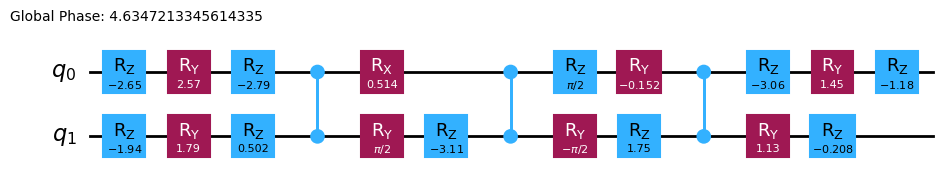

In [ ]:
#operador en termes de paulis (pot ser d'aquesta manera, però el programa de qiskit accceppta altres)
dt=0.5

pauli_strings = [
    "II", "IX", "IY", "IZ",
    "XI", "XX", "XY", "XZ",
    "YI", "YX", "YY", "YZ",
    "ZI", "ZX", "ZY", "ZZ"
]
Am1= SparsePauliOp.from_list([(p, coeff) for p, coeff in zip(pauli_strings, a1)])

Am2= SparsePauliOp.from_list([(p, coeff) for p, coeff in zip(pauli_strings, a2)])

Am3= SparsePauliOp.from_list([(p, coeff) for p, coeff in zip(pauli_strings, a3)])

Am4= SparsePauliOp.from_list([(p, coeff) for p, coeff in zip(pauli_strings, a4)])

Am5= SparsePauliOp.from_list([(p, coeff) for p, coeff in zip(pauli_strings, a5)])

Am6= SparsePauliOp.from_list([(p, coeff) for p, coeff in zip(pauli_strings, a6)])
print(Am6)
#aquesta funcion t'escriu el operador en circuit quantic
circuit = QuantumCircuit(2)
evo1 = PauliEvolutionGate(Am1, time=dt)
circuit.append(evo1, range(2))

evo2 = PauliEvolutionGate(Am2, time=dt)
circuit.append(evo2, range(2))

evo3 = PauliEvolutionGate(Am3, time=dt)
circuit.append(evo3, range(2))

evo4 = PauliEvolutionGate(Am4, time=dt)
circuit.append(evo4, range(2))

evo5 = PauliEvolutionGate(Am5, time=dt)
circuit.append(evo5, range(2))

evo6 = PauliEvolutionGate(Am6, time=dt)
circuit.append(evo6, range(2))

#ara volem especificar en quines portes t'ha d'expressar aquesta operacio
target_basis = ['h', 'x', 'y', 'z', 'id', 'rx', 'ry', 'rz', 't', 'tdg', 'cx', 'cz'] #aqui especifiques la base en que vols que es descompose
circuit_run = transpile(circuit, basis_gates=target_basis, optimization_level=3)

#dibuix del circuit expressat en la teua base de portes, supose que pots extraure els parametres d'altra manera més exacta
circuit_run.draw(output="mpl")

In [ ]:
num=-0.208
num_degrees=num*180/np.pi
if num_degrees<0:
  num_degrees +=360
print(num_degrees)

348.0824778612789


In [ ]:
for instr, qargs, cargs in circuit_run:
    if instr.name in ["rx", "ry", "rz"]:
        radians = instr.params[0]
        degrees = np.degrees(radians)
        if degrees<0:
          degrees=degrees+360
        print(f"{instr.name.upper()}({degrees:.2f}°) en {qargs}")

RX(90.00°) en [<Qubit register=(2, "q"), index=0>]
RZ(139.23°) en [<Qubit register=(2, "q"), index=0>]
RX(90.00°) en [<Qubit register=(2, "q"), index=1>]
RZ(319.23°) en [<Qubit register=(2, "q"), index=1>]
RY(139.23°) en [<Qubit register=(2, "q"), index=0>]
RY(40.77°) en [<Qubit register=(2, "q"), index=1>]
RX(90.00°) en [<Qubit register=(2, "q"), index=0>]
RZ(180.00°) en [<Qubit register=(2, "q"), index=1>]
RX(270.00°) en [<Qubit register=(2, "q"), index=1>]


<ipython-input-18-c3f99c00e7ed>:1: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circuit_run:
